In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

## 0. Data preparation

In [3]:
ads = pd.read_csv('Advertising.csv')
ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
ads.describe()    # need scaling? 

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Train_Test_Split**

Let's split the data into train and test sets. Usually the train set is used for model training, while test set is used for model evaluation. 

In [6]:
X = ads.drop('Sales', axis = 1)

y = ads['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)    

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 3)

(40, 3)

(160,)

(40,)

**Scale the data WITH MinMaxScaler**

Fit the scaler with the training set, then apply the same scaler to transform the training and the test set later.
**Do NOT** fit the scaler with the test data: referencing the test data can lead to data leakage. 

- After scaling, the transformed data is a numpy array without col names. You may add the nameS back if needed.
- Remember to use scaled data for model training and prediction!

In [7]:
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)   
# the above two lines can be combined as X_train_scaled = scaler.fit_transform(X_train)   

X_test_scaled  = scaler.transform(X_test)

In [8]:
# Add the col names back for demonstration 

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

display(X_train_scaled.head(), X_test_scaled.head())

,TV,Radio,Newspaper
0,0.112213,0.778226,0.647
1,0.093739,0.495968,0.013
2,0.474855,0.590726,0.117
3,0.703045,0.415323,0.098
4,0.722887,0.475806,0.567


,TV,Radio,Newspaper
0,0.222716,0.413306,0.174
1,0.157030,0.233871,0.175
2,0.295245,0.006048,0.223
3,0.977078,0.852823,0.503
4,0.568252,0.157258,0.343


## 1. Simple Linear Regression

- predict ``Sales``  with ``TV`` advertising expenditure

**``LinearRegression()`` from ``scikit-learn`` package**

- While both ``scikit-learn`` and ``statsmodels`` packages can successfully fit linear models and make predictions, they differ in several ways and serve different ends: in general, ``scikit-learn`` is designed for prediction, while ``statsmodels``  is more suited for explanatory/inferential analysis. We often ``scikit-learn`` for machine learning.

- Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) of ``LinearRegression()`` for details.

In [13]:
lm1 = LinearRegression().fit(X_train_scaled[['TV']], y_train)    # use TV variable only add a dimension to 2 dimensions

print("lm1 intercept(b): {:.3f}".format(lm1.intercept_))
print("lm1 coefficients (w1): {}".format(lm1.coef_))
print("lm1 features: {}".format(lm1.feature_names_in_)) 

lm1 intercept(b): 7.481
lm1 coefficients (w1): [13.4480769]
lm1 features: ['TV']


Make predictions on train set.   

In [14]:
y_pred1 = lm1.predict(X_train_scaled[['TV']])    # predicted sales value

y_pred1

array([ 8.99018121,  8.74173915, 13.86700691, 16.93572647, 17.20257165,
       12.01749377,  7.68816076,  8.07002542, 13.07567293, 12.10490857,
       12.34414907, 17.85128149, 18.96927077, 15.79933407,  9.34904197,
       10.15877907, 20.76817535, 15.22883748, 16.60907117,  7.62835064,
       19.49375958, 16.383633  , 17.3451958 , 14.06944118, 15.17362813,
       17.30838957, 19.3787401 , 14.81476737, 11.91167585, 10.80288812,
       15.79933407, 13.47133992, 19.88482579, 20.92920261, 11.71844313,
       12.34414907, 19.04288324, 16.68268363, 18.33896406, 16.20420262,
       16.08458237, 11.4193925 ,  9.27082873,  9.04999134,  7.89519582,
       18.30215783,  8.08382775, 16.98633504,  8.47029319, 15.43587253,
       16.81150544, 10.33360867, 14.17985988, 13.24590175, 11.62642755,
       20.02284916, 20.03205071,  7.65135453, 18.83584818, 15.37606241,
        7.83078491, 10.76608189, 16.48485014, 17.87888616, 12.23373038,
       17.68105267, 14.80556582, 13.32411499, 16.80690466, 15.43

Compute **R2** and **Mean Squared Error** on train set.

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

print("lm1 Train MSE: {:.3f}".format(mean_squared_error(y_train, y_pred1)))
print("lm1 Train R2: {:.3f}".format(r2_score(y_train, y_pred1)))

# alternative to compute R2  
lm1.score(X_train_scaled[['TV']], y_train)    # note here no need to make predictions first

lm1 Train MSE: 10.617
lm1 Train R2: 0.588


0.5884742462828709

In [16]:
# Compute RSS manually (equal to MSE * No. of observations)

RSS = ((y_train - y_pred1)**2).sum()      
RSS       # same as mean_squared_error(y_train, y_pred1) * len(y_train)

1698.7581465823766

Check **R2** and **Mean Squared Error** on test set. Make sure we use ``X_test_scaled`` for prediction.

- we already transformed ``X_test`` into ``X_test_scaled``  earlier. 

In [18]:
y_pred1_test = lm1.predict(X_test_scaled[['TV']])   #predict sales on test data

print("lm1 Test R2: {:.3f}".format(r2_score(y_test, y_pred1_test))) 
# alternatively, lm1.score(X_test_scaled[['TV']], y_test)

print("lm1 Test MSE: {:.3f}".format(mean_squared_error(y_test, y_pred1_test)))

lm1 Test R2: 0.676
lm1 Test MSE: 10.186


## 2. Multiple linear regression

- predict ``Sales``  with ``TV``, ``Radio``, ``Newspaper`` advertising expenditure together.

In [19]:
lm2 = LinearRegression().fit(X_train_scaled, y_train)    # Now we use all three features

print("lm2 intercept(b): {}".format(lm2.intercept_))
print("lm2 coefficients (w1,w2,w3): {}".format(lm2.coef_))
print("lm2 features: {}".format(lm2.feature_names_in_)) 

lm2 intercept(b): 3.175184195403437
lm2 coefficients (w1,w2,w3): [13.03190908  9.74625289 -0.2781464 ]
lm2 features: ['TV' 'Radio' 'Newspaper']


In [20]:
# MSE, R2 on train set (much improved compared with single linear regression)

y_pred2 = lm2.predict(X_train_scaled)   

print("lm2 Train MSE: {:.3f}".format(mean_squared_error(y_train, y_pred2)))
print("lm2 Train R2: {:.3f}".format(r2_score(y_train, y_pred2)))

lm2 Train MSE: 2.407
lm2 Train R2: 0.907


<font color=red>***Exercise 1: Your Codes Here***</font>  

- Check R2 and MSE for lm2 on test data.

In [23]:
y_pred2_test = lm2.predict(X_test_scaled)
print("lm2 Train MSE: {:.3f}".format(mean_squared_error(y_test, y_pred2_test)))
print("lm2 Train R2: {:.3f}".format(r2_score(y_test, y_pred2_test)))



lm2 Train MSE: 4.402
lm2 Train R2: 0.860


## 3.  Regression with Categorical & Polynomial Features

Let's start with a new dataset. 

In [24]:
df = pd.read_csv('house_price.csv')  # A simulated data 

df.head()

,dist,age,room,school,price
0,2.000000,12,3,1,17748.526691
1,2.048048,15,3,1,15734.586643
2,2.096096,21,4,0,17801.694257
3,2.144144,0,3,1,20155.145308
4,2.192192,3,4,0,18883.183762


In [ ]:
# def convert_school_variables(col,prefix,df):
#     dummies = pd.get_dummies(df[col],prefix=prefix)
#     df = df.join(dummies)
#     df.drop(col,axis=1,inplace=True)
#     return df

**Train_Test_Split**

- let's *skip* the scaling step as those variables are quite different. 

In [25]:
X = df.drop('price', axis = 1)

y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)    

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 4)

(200, 4)

(800,)

(200,)

### 3.1  Categorical Variables

- Variable ``school`` means whether the house is close to any top ranked school (within 2km): 1 means yes, 0 means no. (Since school is already dummy, no need to transform it).

- Fo categorical variable with multiple categories/unique values, please check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) of ``pandas.get_dummies``.

**Machine Learning Aproach:   ``LinearRegression()`` from ``scikit-learn`` package**

How can we interpret the coefficent for ``school`` (w4)? 

- Compared with houses without top schools in the neighborhood, houses with top schools within 2km will be valued 548 USD more on average. 

In [29]:
m1 = LinearRegression().fit(X_train, y_train)    

print("m1 intercept: {}".format(m1.intercept_))
print("m1 coefficients: {}".format(m1.coef_))
print("m1 features: {}".format(m1.feature_names_in_))  # get feature names

m1 intercept: 27333.76833092166
m1 coefficients: [-206.6458122  -760.50998783  321.35940265  548.76431954]
m1 features: ['dist' 'age' 'room' 'school']


In [30]:
# MSE, R2 on train set

train_pred1 = m1.predict(X_train)

print("m1 Train MSE: {:.3f}".format(mean_squared_error(y_train, train_pred1)))
print("m1 Train R2: {:.3f}".format(r2_score(y_train, train_pred1)))

m1 Train MSE: 14342892.089
m1 Train R2: 0.788


<font color=red>***Exercise 2: Your Codes Here***</font>  
- Check MSE and R2 scores on test data. 

In [32]:
train_pred1_test = m1.predict(X_test)
print("ml Train MSE: {:.3f}".format(mean_squared_error(y_test, train_pred1_test)))
print("ml Train R2: {:.3f}".format(r2_score(y_test, train_pred1_test)))


ml Train MSE: 13400027.297
ml Train R2: 0.815


In [33]:
from sklearn import preprocessing
z_score_scaler  = preprocessing.StandardScaler()
X_scale_z_score = z_score_scaler.fit_transform(X_train)
X_scale_z_score = pd.DataFrame(X_scale_z_score, columns = df.columns)

X_scale_z_score.head(6)

ValueError: ignored

### 3.2 Polynomial Features: Interaction Terms only 

To generate interaction terms, use ``PolynomialFeatures()`` from ``sklearn.preprocessing``.
- This generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 
- Check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) for details. 

**Feature Engineering**

- keep only interaction terms with maxmium ``degree =2`` (as we only need 2 degree interaction here).   

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly1 = PolynomialFeatures(degree = 2,             # degree = 2 (default)  
              interaction_only=True,  # only interaction terms  (False by default)
              include_bias=False)     # no need to add 1 for intercept (auto-added in the model)  
                                                               

X_train_poly = poly1.fit_transform(X_train)        # Fit transformer to data, then transform it.   

display(X_train_poly.shape, poly1.get_feature_names_out())      

(800, 10)

array(['dist', 'age', 'room', 'school', 'dist age', 'dist room',
       'dist school', 'age room', 'age school', 'room school'],
      dtype=object)

**We got 10 features in total!**

- Different from that displayed in lecture (which only include the first 5 features), here we include all 10 features in modeling.

- Note m2 has no ``feature_names_in_`` attribute, as ``X_train_poly`` is an array without col names. We then get feature names from the polynomial transformer.

In [35]:
m2 = LinearRegression().fit(X_train_poly, y_train)      

print("m2 intercept(b): {}".format(m2.intercept_))

# Put coefficients in a data frame for better visualization.
pd.DataFrame({'features':poly1.get_feature_names_out(), "coefs": m2.coef_})

m2 intercept(b): 23046.929479367893


,features,coefs
0,dist,-40.672195
1,age,-399.223853
2,room,317.761946
3,school,-368.082695
4,dist age,-13.777894
5,dist room,0.352720
6,dist school,29.075926
7,age room,-0.860280
8,age school,-6.046453
9,room school,38.387584


In [36]:
# MSE, R2 on train

train_pred2 = m2.predict(X_train_poly)

print("m2 Train MSE: {:.3f}".format(mean_squared_error(y_train, train_pred2)))
print("m2 Train R2: {:.3f}".format(r2_score(y_train, train_pred2)))

m2 Train MSE: 11544193.117
m2 Train R2: 0.830


<font color=red>***Exercise 3: Your Codes Here***</font>  
- Check MSE and R2 scores of m2 on test data. 

Hints: Apply  transformer ``poly1``, which was trained on train data, to test data, i.e., use ``poly1.transform()`` to transform ``X_test`` before prediction. Not need to fit the transformer again. 

In [37]:
X_test_poly = poly1.fit_transform(X_test)
train_pred2_test = m2.predict(X_test_poly)

print("m2 Train MSE: {:.3f}".format(mean_squared_error(y_test, train_pred2_test)))
print("m2 Train R2: {:.3f}".format(r2_score(y_test, train_pred2_test)))

m2 Train MSE: 10072771.476
m2 Train R2: 0.861


### 3.3 Polynomial Features: Exponential Terms only

Let's use some similated data here.

In [38]:
rng = np.random.RandomState(1)

X = 10 * rng.rand(500)    # 1D array with 500 random values between [0, 1).

y = np.sin(X) + 0.1 * rng.randn(500)  # non-linear relationship 

df = pd.DataFrame({'X': X, 'y': y})

display(df.shape, df.head())

(500, 2)

,X,y
0,4.170220,-0.868190
1,7.203245,0.778092
2,0.001144,-0.092248
3,3.023326,0.064689
4,1.467559,0.852020


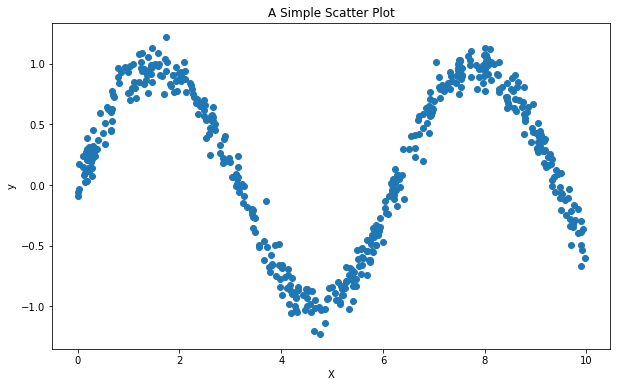

In [39]:
# Plot the data as scatterplot, is that linear? 

plt.figure(figsize=(10,6))
plt.scatter(df['X'], df['y'])   
plt.xlabel('X')
plt.ylabel('y')
plt.title('A Simple Scatter Plot');

**Split the Data into Train and Test**
- after this, again we don't don any scaling.

In [40]:
X = df[['X']]    #2D features, same as df.drop('y', axis = 1)

y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)    

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 1)

(100, 1)

(400,)

(100,)

**Feature Engineering**

We need to raise ``X`` to higher dimensions (X^2, X^3...) before modeling. 
- Raise ``X`` to its 7rd degree, exclude interaction terms (by default ``interaction_only=True``, so just ignore it).
- Note that if three are multiple variables, both exponential forms and interaction terms between them will be generated. 

In [41]:
poly2 = PolynomialFeatures(degree = 7, include_bias = False)   

X_train_poly = poly2.fit_transform(X_train)

display(poly2.get_feature_names_out(), X_train_poly.shape,X_train_poly)   # now you have X,X**2...X**7

array(['X', 'X^2', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7'], dtype=object)

(400, 7)

array([[9.29437234e+00, 8.63853571e+01, 8.02897674e+02, ...,
        6.93586023e+04, 6.44644675e+05, 5.99156763e+06],
       [3.24362460e+00, 1.05211005e+01, 3.41265005e+01, ...,
        3.59048342e+02, 1.16461803e+03, 3.77758370e+03],
       [1.37474704e+00, 1.88992943e+00, 2.59817489e+00, ...,
        4.91036718e+00, 6.75051276e+00, 9.28024744e+00],
       ...,
       [9.23024536e+00, 8.51974293e+01, 7.86393176e+02, ...,
        6.69986771e+04, 6.18414228e+05, 5.70811505e+06],
       [2.93614148e+00, 8.62092681e+00, 2.53122608e+01, ...,
        2.18215148e+02, 6.40710549e+02, 1.88121682e+03],
       [5.79745219e+00, 3.36104519e+01, 1.94854988e+02, ...,
        6.54916421e+03, 3.79684664e+04, 2.20120369e+05]])

In [42]:
m3 = LinearRegression()

m3.fit(X_train_poly,y_train)

print("m3 intercept:", m3.intercept_)

# Put coefficients in a data frame for better visualization.
pd.DataFrame({'features':poly2.get_feature_names_out(), "coefs": m3.coef_})

m3 intercept: 0.1069794761613472


,features,coefs
0,X,0.218936
1,X^2,1.270595
2,X^3,-1.011064
3,X^4,0.269386
4,X^5,-0.032131
5,X^6,0.001741
6,X^7,-0.000034


In [43]:
#MSE and R2 on train data (quite hight!)

train_pred3 = m3.predict(X_train_poly)

print("m3 Train MSE: {:.3f}".format(mean_squared_error(y_train, train_pred3)))
print("m3 Train R2: {:.3f}".format(r2_score(y_train, train_pred3)))

m3 Train MSE: 0.011
m3 Train R2: 0.976


Now let's visualize the model. 
- To visualize the model (which is a curly line), let's generate some evenly spaced values and make predictions on them. Plotting a line connecting those values will be the model.

In [44]:
new_X = np.linspace(0, 10, 1000)         # new X: 100 evenly spaced numbers over [0,10).
new_X_2D = new_X[:, np.newaxis]          # make sure features are in 2

X_poly = poly2.transform(new_X_2D)       # apply the transformer on X_fit_2D

y_pred = m3.predict(X_poly)              # predicted_y 

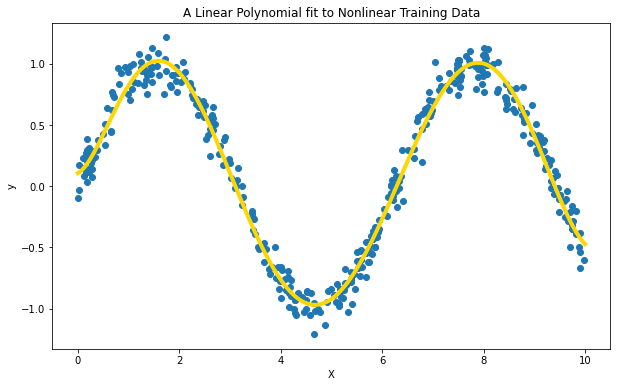

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(X_train['X'], y_train)   # the training data
plt.xlabel('X')
plt.ylabel('y')

plt.plot(new_X, y_pred, color = 'gold', linewidth = 4);   # the model
plt.title('A Linear Polynomial fit to Nonlinear Training Data');

<font color=red>***Exercise 4: Your Codes Here***</font>  
- Check MSE and R2 scores of m3 on test data. 

Hints: need to use ``poly2.transform()`` to transform ``X_test`` before prediction.  

In [55]:
X_test_poly = poly2.transform(X_test)
test_pred3 = m3.predict(X_test_poly)
print("m3 Train MSE: {:.3f}".format(mean_squared_error(y_test, test_pred3)))
print("m3 Train R2: {:.3f}".format(r2_score(y_test, test_pred3)))

m3 Train MSE: 0.013
m3 Train R2: 0.966
